In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import math

# Read Data

In [8]:
PATH_NAME_CO2 = 'archive.csv'
train = pd.read_csv(PATH_CO2, encoding='CP949')

In [9]:
train

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06
...,...,...,...,...,...,...,...
715,2017,8,2017.6219,NaN,NaN,NaN,NaN
716,2017,9,2017.7068,NaN,NaN,NaN,NaN
717,2017,10,2017.7890,NaN,NaN,NaN,NaN
718,2017,11,2017.8740,NaN,NaN,NaN,NaN


In [11]:
train = train.to_numpy()

In [14]:
print("Total data shape is", train.shape)
print("The number of sample is ",len(train[0]))
co2 = train[:,3]

Total data shape is (720, 7)
The number of sample is  7


### Data visualization

Text(0.5, 0, 'time series')

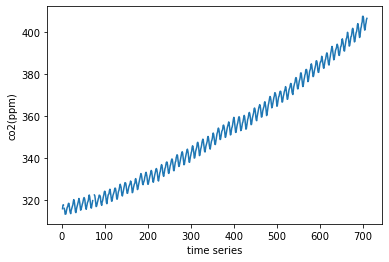

In [23]:
plt.plot(co2)
plt.ylabel('co2(ppm)')
plt.xlabel('time series')

In [38]:
p = 7 # window size
size = train.shape[0] # sample size

X = np.zeros((1,p))
Y = np.zeros(shape=(1,))
x = np.zeros(shape=(1,p))
y = np.zeros(shape=(1,))


for i in range(size-p-1):
    if math.isnan(co2[i]): #when the value is nan
            continue
    else: # when the value is not nan
        for m in range(p):
            x[0,m]=co2[i+m]
        if np.sum(np.isnan(x))>0 :
            continue
        y=co2[i+p] # 다음달 co2 concentration
        if math.isnan(y): # y값이 NaN이면 무시하고 다시 새로 시작
            continue
        X=np.vstack([X,x])
        Y=np.vstack([Y,y])


In [39]:
print(X.shape)
print(Y.shape)

(684, 7)
(684, 1)


In [41]:
print(X[0])
print(Y[0])

[0. 0. 0. 0. 0. 0. 0.]
[0.]


In [91]:
X_i = X[1:,:]
Y_i = Y[1:,:]
print(X_i.shape)

(683, 7)


# Test using Sklearn Library

In [37]:
# test용 코드
from sklearn.metrics import mean_squared_error

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]


for a in alphas:
    model = linear_model.Ridge(alpha=a).fit(X_i,Y_i)
    score = model.score(X_i, Y_i)
    pred_y = model.predict(X_i)
    mse = mean_squared_error(Y_i, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:0.0010, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:0.0100, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:0.1000, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:0.3000, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:0.5000, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:0.7000, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:1.0000, R2:1.00, MSE:0.47, RMSE:0.69


In [40]:
# test용 코드
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_i, Y_i, test_size=0.2,random_state=1)

ridge = linear_model.Ridge(alpha=0.0001).fit(X_train, Y_train)
Y_pred = ridge.predict(X_test)
score_ridge = ridge.score(X_test, Y_test)
mse_ridge = mean_squared_error(Y_test, Y_pred)
print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

Final Result: Ridge R2:0.999, MSE:0.41, RMSE:0.64


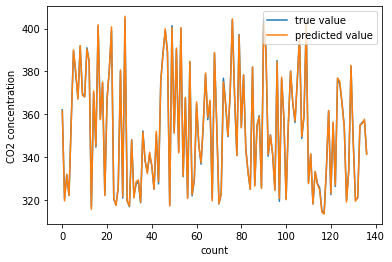

In [45]:
# comparison true value and predicted value

count = np.array(range(Y_test.shape[0]))

plt.plot(count, Y_test, label='true value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y_pred, label='predicted value')
plt.legend()
plt.show()

In [48]:
print(X_i.shape)

(683, 7)


In [28]:
# 직접 작성하는 코드
from numpy.linalg import inv
N = X_i.shape[0]
# standardization
X_std = np.zeros(shape=(N,p))

for i in range(p):
    mean = np.mean(X_i[:,i])
    std = np.std(X_i[:,i])
    X_std[:,i] = X_i[:,i]-mean

    
lamb = 0.1 # penalized할 때 사용하는 값

In [24]:
print(X_std[:,1].shape)

(683,)


In [29]:
X_trans = np.transpose(X_std)
save = np.matmul(inv(np.matmul(X_trans,X_std)+lamb*np.identity(p)),X_trans)
beta_ridge = np.matmul(save, Y_i)
beta_0 = np.sum(Y_i)/N

beta = np.vstack([beta_0, beta_ridge])
y_hat = np.matmul(X_std, beta_ridge)
y_pred = beta_0 + y_hat

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_i, y_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  0.47371437964825786 0.6882691186216754


In [18]:
print(beta_ridge.shape)
print(Y_i.shape)
print(y_hat.shape)

(7, 1)
(683, 1)
(683, 1)


# HW1

In [42]:
def window_sliding(c,p):
#     """"
#     Window sliding except nan value.
    
#     ===========================================
#     - Input:
#     c02 : array type.
#     p: size of window
    
#     - Output:
#     X : the number of sample by window size array 
#     Y : 
#     ===========================================
#     """"
    size = train.shape[0] # sample size
    
    X = np.zeros((1,p))
    Y = np.zeros(shape=(1,))
    x = np.zeros(shape=(1,p))
    y = np.zeros(shape=(1,))


    for i in range(size-p-1):
        if math.isnan(c[i]): #when the value is nan
                continue
        else: # when the value is not nan
            for m in range(p):
                x[0,m]=c[i+m]
            if np.sum(np.isnan(x))>0 :
                continue
            y=c[i+p] # 다음달 co2 concentration
            if math.isnan(y): # y값이 NaN이면 무시하고 다시 새로 시작
                continue
            X=np.vstack([X,x])
            Y=np.vstack([Y,y])
            X_i = X[1:,:]
            Y_i = Y[1:,:]
            
    return X_i,Y_i

In [45]:
X_i,Y_i = window_sliding(co2,7)
std = np.std(X_i[:,1])
print(std)

25.65740577811771


In [49]:
X_i.shape

(683, 7)

In [59]:
from numpy.linalg import inv
def standard(X):
    N = X.shape[0]
    p = X.shape[1]
    X_std = np.zeros(shape=(N,p))
    X_mean = np.zeros(shape=(1,))
    for i in range(p):
        mean = np.mean(X[:,i])
        #std = np.std(X[:,i])
        X_std[:,i] = X[:,i]-mean
        a = mean.reshape((1,-1))
        X_mean = np.vstack([X_mean, mean])
        
    return X_std, X_mean,



def solve(X,y,lamb):
    N = X.shape[0]
    p = X.shape[1]
    
    X_trans = np.transpose(X)
    save = np.matmul(inv(np.matmul(X_trans,X)+lamb*np.identity(p)),X_trans)
    beta_ridge = np.matmul(save, y)
    beta_0 = np.sum(y)/N

    #beta = np.vstack([beta_0, beta_ridge])
    return beta_ridge, beta_0

In [57]:
# 직접 짠 코드를 test
from sklearn.metrics import mean_squared_error

# traning 과정


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_i, Y_i, test_size=0.2, random_state=1)

# training

X_std = np.zeros(shape=(X_train.shape[0],X_train.shape[1]))
X_std,X_mean = standard(X_train)
beta_ridge, beta_0 = solve(X_std, Y_train,0.1)



In [63]:
X_test.shape

(137, 7)

# Checking Alpha dependence

In [73]:
alpha_list = np.linspace(0,10,30)


mse_l = []
for a in alpha_list:
    beta_ridge, beta_0 = solve(X_std, Y_train,a)
    
    #test data
    
    test_std = X_test - np.transpose(X_mean[1:])
    Y_pred = np.matmul(test_std, beta_ridge)+beta_0

    mse = mean_squared_error(Y_test, Y_pred)
    print("Result MSE, RMSE ",mse, np.sqrt(mse))
    mse_l.append(np.sqrt(mse))
    

Result MSE, RMSE  0.4119166108109058 0.6418073003720866
Result MSE, RMSE  0.41200706839698437 0.6418777674892505
Result MSE, RMSE  0.41212052111887454 0.6419661370499806
Result MSE, RMSE  0.4122560575621062 0.6420716919177376
Result MSE, RMSE  0.41241281624304094 0.6421937528838481
Result MSE, RMSE  0.41258998194335667 0.6423316759613811
Result MSE, RMSE  0.41278678239502165 0.642484849934239
Result MSE, RMSE  0.41300248528504635 0.6426526941397246
Result MSE, RMSE  0.41323639534609863 0.6428346563044798
Result MSE, RMSE  0.4134878519418275 0.6430302107536064
Result MSE, RMSE  0.4137562266437513 0.6432388566028574
Result MSE, RMSE  0.41404092117330993 0.6434601162257921
Result MSE, RMSE  0.4143413653665603 0.6436935337305792
Result MSE, RMSE  0.41465701544684996 0.6439386736692012
Result MSE, RMSE  0.41498735231531764 0.6441951197543472
Result MSE, RMSE  0.4153318800493999 0.6444624737324897
Result MSE, RMSE  0.41569012446725473 0.6447403543033853
Result MSE, RMSE  0.4160616318626284 0

Text(0, 0.5, 'RMSE')

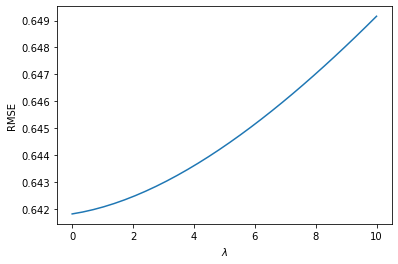

In [75]:
plt.plot(alpha_list.tolist(),mse_l)
plt.xlabel('$\lambda$')
plt.ylabel('RMSE')

In [37]:
print(beta_ridge)
print(beta_0)

[[ 0.39005535]
 [-0.60418086]
 [ 0.26438981]
 [ 0.30876097]
 [-0.16131718]
 [-0.98105286]
 [ 1.78508866]]
353.5192307692308


In [45]:
# test
test_std = standard(X_test)
Y_pred = np.matmul(test_std, beta_ridge)+beta_0

mse = mean_squared_error(Y_test, Y_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  0.7125407199995372 0.8441212709081185


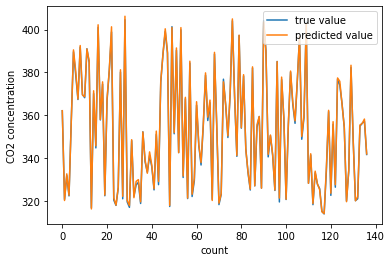

In [46]:
count = np.array(range(Y_test.shape[0]))

plt.plot(count, Y_test, label='true value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y_pred, label='predicted value')
plt.legend()
plt.show()

In [77]:
Y = np.hstack([Y_test, Y_pred])
n = Y_test.shape[0]


Y_copy = Y.copy()

for i in range(1,n):
    key = Y[i,:].copy()
    for k in range(i):
        print(Y[:3,0])
        if Y[i-1-k,0]> key[0]:
            save = Y[i-1-k,:].copy()
            print(key)
            print(Y[i-1-k,:])
            Y[i-k,:] = save
            Y[i-1-k,:] = key
            print(key)
        else:
            print(k)
            break

print(Y.shape)
            

[362.05 320.58 331.75]
[320.58       320.10385877]
[362.05       362.06742894]
[320.58       320.10385877]
[320.58 362.05 331.75]
[331.75       332.54869237]
[362.05       362.06742894]
[331.75       332.54869237]
[320.58 331.75 362.05]
1
[320.58 331.75 362.05]
[322.25       322.56385493]
[362.05       362.06742894]
[322.25       322.56385493]
[320.58 331.75 322.25]
[322.25       322.56385493]
[331.75       332.54869237]
[322.25       322.56385493]
[320.58 322.25 331.75]
2
[320.58 322.25 331.75]
[357.16       356.67560397]
[362.05       362.06742894]
[357.16       356.67560397]
[320.58 322.25 331.75]
1
[320.58 322.25 331.75]
0
[320.58 322.25 331.75]
[378.81       380.56922217]
[389.62       390.49193587]
[378.81       380.56922217]
[320.58 322.25 331.75]
1
[320.58 322.25 331.75]
[367.31       367.52177387]
[389.62       390.49193587]
[367.31       367.52177387]
[320.58 322.25 331.75]
[367.31       367.52177387]
[378.81       380.56922217]
[367.31       367.52177387]
[320.58 322.25 331.

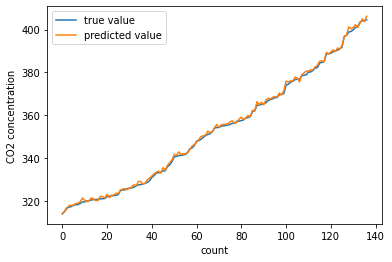

In [78]:
count = np.array(range(Y.shape[0]))

plt.plot(count, Y[:,0], label='true value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y[:,1], label='predicted value')
plt.legend()
plt.show()

In [75]:
# 전체 데이터에 대해서 prediction

X_total = standard(X_i)
Y_total_pred = np.matmul(X_total, beta_ridge)+beta_0

mse = mean_squared_error(Y_i, Y_total_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  0.48740636649374164 0.6981449466219329


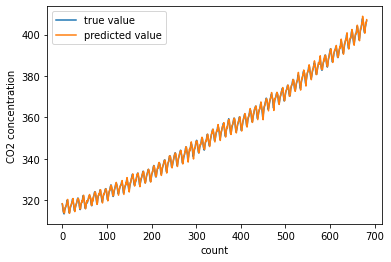

In [76]:
count = np.array(range(Y_total_pred.shape[0]))
plt.plot(count, Y_total_pred, label='predicted value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y_i, label='true value')
plt.legend()
plt.show()

# Try 2

#### 시각적으로 보기 좋게 하기 위해 다시 test 진행

In [95]:
X_train = X_i[:500, :]
X_test = X_i[500:, :]
Y_train = Y_i[:500]
Y_test = Y_i[500:]

In [101]:
X_std = np.zeros(shape=(X_train.shape[0],X_train.shape[1]))

X_std, X_mean = standard(X_train)

beta_ridge, beta_0 = solve(X_std, Y_train)

In [103]:
X_mean = X_mean[1:]
print(X_mean)

[[339.97286]
 [340.0892 ]
 [340.19824]
 [340.30186]
 [340.4026 ]
 [340.50592]
 [340.60964]]


In [105]:
print(X_test[:3])
a = X_test - np.transpose(X_mean)
print(a[:3])

[[374.02 373.31 371.62 369.55 367.96 368.1  369.68]
 [373.31 371.62 369.55 367.96 368.1  369.68 371.24]
 [371.62 369.55 367.96 368.1  369.68 371.24 372.44]]
[[34.04714 33.2208  31.42176 29.24814 27.5574  27.59408 29.07036]
 [33.33714 31.5308  29.35176 27.65814 27.6974  29.17408 30.63036]
 [31.64714 29.4608  27.76176 27.79814 29.2774  30.73408 31.83036]]


In [106]:
# test
test_std = X_test - np.transpose(X_mean)
Y_pred = np.matmul(test_std, beta_ridge)+beta_0

mse = mean_squared_error(Y_test, Y_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  0.6222206246713322 0.7888096251132666


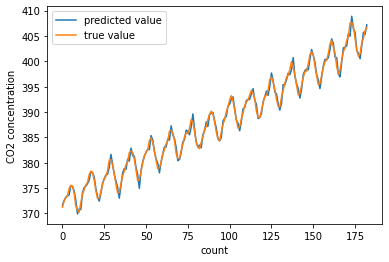

In [107]:
count = np.array(range(Y_pred.shape[0]))
plt.plot(count, Y_pred, label='predicted value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y_test, label='true value')
plt.legend()
plt.show()